In [158]:
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

data = np.random.randn(10000)
# sort the data:
data_sorted = np.sort(data)

p = np.linspace(0, 1, len(data), endpoint=False)

def f(x): return np.interp(x, p, data_sorted)

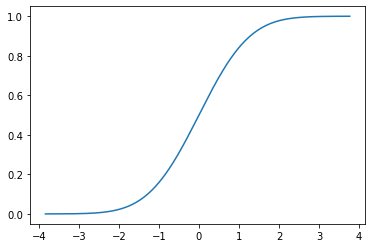

In [3]:
# for unbiased estimator of cdf

# OR WE CAN DO THE SAME USING SCIPY

# generate samples from normal distribution (discrete data)
x = np.random.randn(10000)
norm_cdf = scipy.stats.norm.cdf(x)  # calculate the cdf - also discrete
# plot the cdfk
sns.lineplot(x=x, y=norm_cdf) 
plt.show()

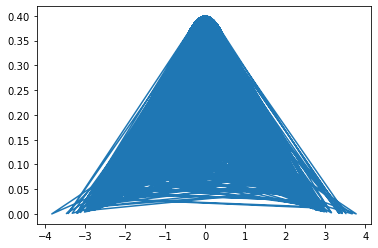

In [4]:
#plot the pdf
plt.plot(x, scipy.stats.norm.pdf(x))
plt.show()

In [127]:
#plot the pmf
def cnt_vals(num_arr):
    cnt = Counter()
    for num in x:
        num = int((num*1000))//100
        cnt[num] += 1
    return cnt

In [128]:
def pmf(num_arr):
    n_nums = len(num_arr)
    nums_cnt = dict(cnt_vals(num_arr))
    for i in nums_cnt.keys():
        nums_cnt[i] = nums_cnt[i]/n_nums
    return nums_cnt

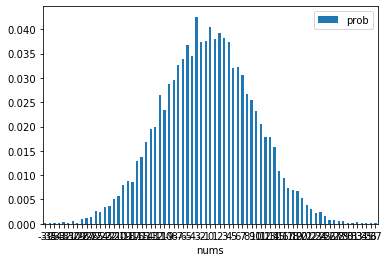

In [129]:
pmf_calc = pmf(x)

nums = list(pmf_calc.keys())
prob = list(pmf_calc.values())
data = pd.DataFrame({'nums':nums, 'prob':prob}).sort_values(by='nums')

data.plot.bar(x='nums', y='prob', rot=0)

In [154]:
def pmf_2(vals_arr):
    vals_cnt = cnt_vals(vals_arr)
    num_sum = 0
    for i in vals_cnt.values():
        num_sum += i
    for i in vals_cnt.keys():
        vals_cnt[i] = vals_cnt[i]/num_sum
    return vals_cnt

In [155]:
pmf_calc = pmf_2(x)
nums = list(pmf_calc.keys())
prob = list(pmf_calc.values())
data = pd.DataFrame({'nums':nums, 'prob':prob}).sort_values(by='nums')

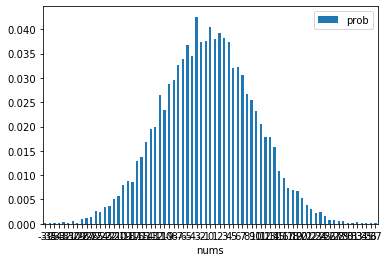

In [156]:
data.plot.bar(x='nums', y='prob', rot=0)

In [164]:
def rand_4_nums(num_arr):
    out_arr = []
    for i in np.random.randint(0, len(num_arr), 4):
        out_arr.append(num_arr[i])
    return out_arr

In [166]:
rand_num_list = rand_4_nums(f(x))
rand_num_list

[4.161675510836435,
 -0.6240264216968191,
 0.7720106168557589,
 -3.4545790569606214]

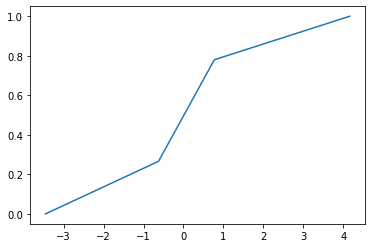

In [167]:
norm_cdf = scipy.stats.norm.cdf(rand_num_list)
sns.lineplot(x=rand_num_list, y=norm_cdf) 
plt.show()

# Q. 7

The functionality of this method takes in a list of SORTED values, a percent(The PERCENTILE value requested), key (function which returns a k:v pair. From this, we first determine if the index created by multiplying length of our list by the percent is a whole number; this is important because indeces are whole numbers. Next this method calculates an upper and lower limit which contains the percentile value requested. This will increase the accuracy of our return value later. NOTE: if "f" was whole number then k is returned as an int which represents the percentile value requested. If not, then f and c are averaged and then returned as a sum. This ensures in the outlier case that, when the percentile value falls between two values, the weighted average of those two values are returned.

In [169]:
def percentile(N, percent=0.25, key=lambda x:x): 

    """ 

    Find the percentile of a list of values. 

 

    @parameter N - is a list of values. Note N MUST BE already sorted. 

    @parameter percent - a float value from 0.0 to 1.0. 

    @parameter key - optional key function to compute value from each element of N. 

 

    @return - the percentile of the values 

    """ 

    if N is None: 

        return None 

    k = (len(N)-1) * percent 

    f = math.floor(k) 

    c = math.ceil(k) 

    if f == c: 

        return key(N[int(k)]) 

    d0 = key(N[int(f)]) * (c-k) 

    d1 = key(N[int(c)]) * (k-f) 

    return d0+d1 